In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from src.dataset import SIModel
import seaborn as sns

In [2]:
sns.set_theme()
beta_true = 0.15
alpha = 0.1
gamma = 0.0
prior_mu = -3
prior_sigma = 1
n_zones = 1
N = 100
T = 52
K = 30

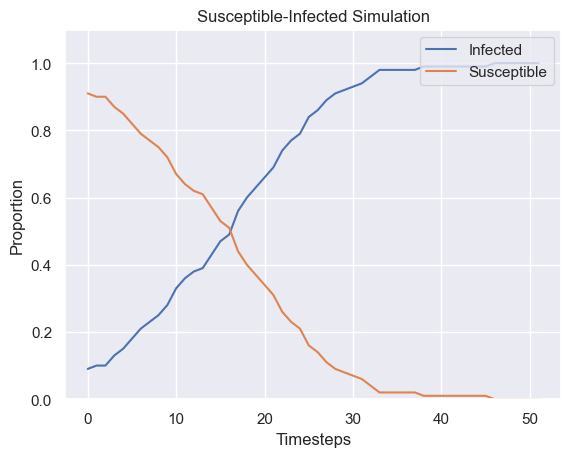

In [5]:
si_model = SIModel(alpha, gamma, beta_true, n_zones, 
                   prior_mu, prior_sigma, 
                   N, T, summarize=False, n_sample=100)

x_o_raw = si_model.get_observed_data(29)[0]
I_o = np.array(x_o_raw)
S_o  = 1 - I_o
plt.plot(I_o, label="Infected")
plt.plot(S_o, label="Susceptible")
plt.legend(loc="upper right")
plt.xlabel("Timesteps")
plt.ylabel("Proportion")
plt.ylim(0, 1.1)
plt.title("Susceptible-Infected Simulation")
plt.show()

In [20]:
si_model = SIModel(.1, 0.05, beta_true, n_zones, 
                   prior_mu, prior_sigma, 
                   N, T, summarize=False, n_sample=100)

means = []
xs = si_model.data
for i in range(len(xs)):
    means.append(xs[i].sum())

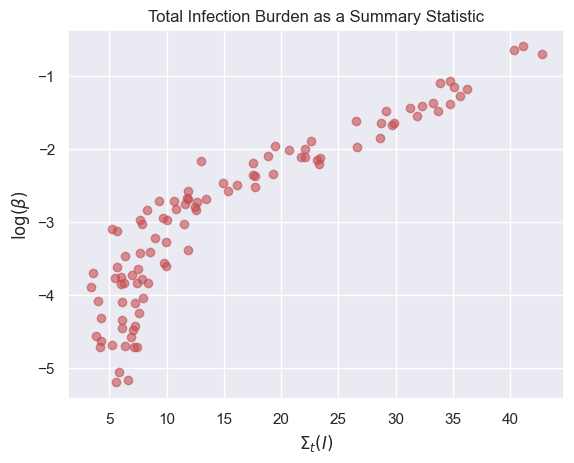

In [21]:
plt.scatter(np.array(means), np.array(si_model.theta), alpha=0.6, color="r")
plt.ylabel(r"$\log(\beta)$")
plt.xlabel(r"$\Sigma_t(I)$")
plt.title("Total Infection Burden as a Summary Statistic")
plt.show()

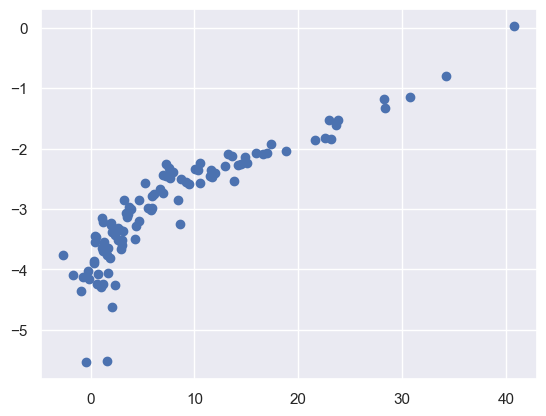

In [110]:
plt.scatter(np.array(means_alt), np.array(si_model.theta))